**By Punith V T 
   1MJ21CD038,
   Dept Of CSE(Data Science),
   MVJCE**
   

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset directory
dataset_path = '/kaggle/input/fire-dataset/fire_dataset'  

# Create an ImageDataGenerator instance
datagen = ImageDataGenerator(
    rescale=1./255,      # Normalize pixel values to [0, 1]
    validation_split=0.2 # Use 20% of data for validation
)

# Load training data
training_set = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Resize images to match model input
    batch_size=32,
    class_mode='binary',    
    subset='training'       
)

# Load validation data
validation_set = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='binary',
    subset='validation'     
)


Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

# Build the CNN model
model = Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())

# Print model summary to check the shapes
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=25,
    validation_data=validation_set,
    validation_steps=validation_set.samples // validation_set.batch_size
)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7211 - loss: 0.4454 - val_accuracy: 0.9375 - val_loss: 0.2201
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0529
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9450 - loss: 0.1580 - val_accuracy: 0.8958 - val_loss: 0.2005
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 6.6481e-04
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9530 - loss: 0.1239 - val_accuracy: 0.9531 - val_loss: 0.1145
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8571 - val_loss: 0.3614
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9659 - loss: 0.0801 - val_accuracy: 0.9375 - val_loss: 0.1547
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+0

In [23]:
#model.save('fire_detection_model.h5')
# Save the entire model to a file
model.save('/kaggle/working/fire_detection_model.h5')  # Update the path as needed


In [7]:
!ls /kaggle/working/

fire_detection_model.h5


In [38]:
print(history.history)

{'accuracy': [0.8349999785423279, 0.0, 0.949999988079071, 0.0, 0.9599999785423279, 0.0, 0.956250011920929, 0.0, 0.9599999785423279, 0.0, 0.9787499904632568, 0.0, 0.9775000214576721, 0.0, 0.981249988079071, 0.0, 0.9712499976158142, 0.0, 0.9700000286102295, 0.0, 0.9700000286102295, 0.0, 0.9887499809265137, 0.0, 0.9825000166893005], 'loss': [0.3455747365951538, 0.0, 0.14240029454231262, 0.0, 0.13045033812522888, 0.0, 0.11362209171056747, 0.0, 0.09246141463518143, 0.0, 0.07301177829504013, 0.0, 0.052288129925727844, 0.0, 0.048175711184740067, 0.0, 0.061546336859464645, 0.0, 0.11184857040643692, 0.0, 0.06630905717611313, 0.0, 0.03947419300675392, 0.0, 0.04668177291750908], 'val_accuracy': [0.9375, 1.0, 0.8958333134651184, 1.0, 0.953125, 0.8571428656578064, 0.9375, 1.0, 0.9583333134651184, 1.0, 0.9375, 1.0, 0.96875, 1.0, 0.96875, 1.0, 0.9739583134651184, 0.8571428656578064, 0.8802083134651184, 1.0, 0.9635416865348816, 1.0, 0.9635416865348816, 1.0, 0.96875], 'val_loss': [0.22011740505695343, 

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 403ms/step


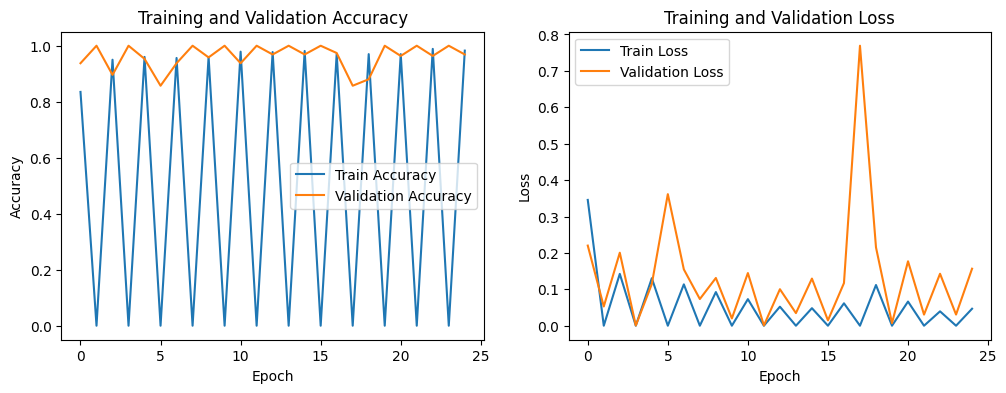

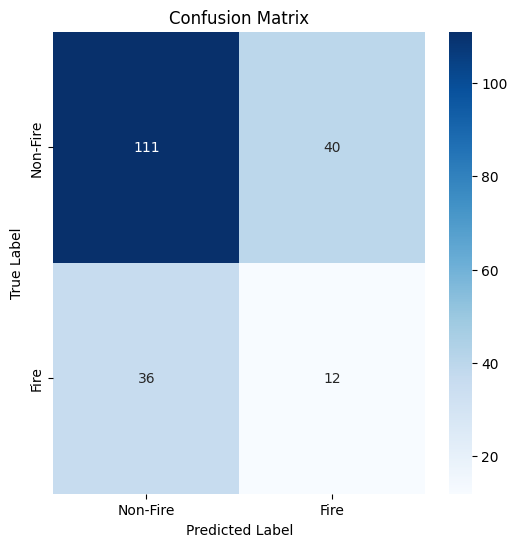

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model
validation_set.reset()
predictions = model.predict(validation_set, steps=validation_set.samples // validation_set.batch_size + 1)
y_pred = np.where(predictions > 0.5, 1, 0)
y_true = validation_set.classes

# Confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred, target_names=['Non-Fire', 'Fire'])

# Save accuracy and loss plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.savefig('/kaggle/working/training_plots.png')

# Save the confusion matrix plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fire', 'Fire'], yticklabels=['Non-Fire', 'Fire'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('/kaggle/working/confusion_matrix.png')

In [ ]:
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image
import tempfile

# Load the trained model
model = load_model('C:/Users/punit/PycharmProjects/fire_detection_model.h5')

# Function to preprocess the frame
def preprocess_frame(frame):
    frame = cv2.resize(frame, (150, 150))  # Match the size used during training
    frame = frame / 255.0  # Normalize the frame
    frame = np.expand_dims(frame, axis=0)  # Reshape for model input (1, 150, 150, 3)
    return frame

# Function to predict fire in a frame
def predict_fire(frame):
    preprocessed_frame = preprocess_frame(frame)
    prediction = model.predict(preprocessed_frame)
    return prediction[0][0] < 0.45

# Streamlit app
st.title("Forest Fire Detection")

# Option selection
option = st.selectbox("Select input type", ("Upload Image", "Upload Video", "Use Live Webcam"))

if option == "Upload Image":
    uploaded_image = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])
    if uploaded_image is not None:
        image = Image.open(uploaded_image)
        frame = np.array(image)

        # Perform fire detection
        if predict_fire(frame):
            st.write("Fire Detected")
            st.image(frame, caption='Fire Detected', use_column_width=True)
        else:
            st.write("No Fire")
            st.image(frame, caption='No Fire', use_column_width=True)

elif option == "Upload Video":
    uploaded_video = st.file_uploader("Choose a video...", type=["mp4", "avi", "mov"])
    if uploaded_video is not None:
        tfile = tempfile.NamedTemporaryFile(delete=False) 
        tfile.write(uploaded_video.read())
        cap = cv2.VideoCapture(tfile.name)
        
        stframe = st.empty()
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            
            # Perform fire detection
            if predict_fire(frame):
                label = "Fire Detected"
                color = (0, 0, 255)  # Red color for fire
            else:
                label = "No Fire"
                color = (0, 255, 0)  # Green color for no fire

            # Display the label on the frame
            cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

            # Convert the frame to RGB (from BGR)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Display the frame in Streamlit
            stframe.image(frame, channels="RGB")
        
        cap.release()

elif option == "Use Live Webcam":
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        st.error("Could not open webcam.")
    else:
        # Place the checkbox outside the loop
        stop_button_pressed = st.checkbox("Stop Webcam", key="stop_button")

        stframe = st.empty()
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                st.error("Failed to capture video frame.")
                break

            # Perform fire detection
            if predict_fire(frame):
                label = "Fire Detected"
                color = (0, 0, 255)  # Red color for fire
            else:
                label = "No Fire"
                color = (0, 255, 0)  # Green color for no fire

            # Display the label on the frame
            cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

            # Convert the frame to RGB (from BGR)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Display the frame in Streamlit
            stframe.image(frame, channels="RGB")

            # Break the loop if the stop button is pressed
            if stop_button_pressed:
                break

        cap.release()
        cv2.destroyAllWindows()